In [27]:
#Here you must specify your own path
root = ''

In [28]:
pip install xgboost

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

In [30]:
# Dic to get the respective target values of the numbers.
target_dic = {
    0: '(0, 20]constant',
    1: '(20, 40]constant',
    2: '(40, 60]constant',
    3: '(60, 80]constant',
    4: '(80, 100]constant',
    5: '(0, 20]intermittent',
    6: '(20, 40]intermittent',
    7: '(40, 60]intermittent',
    8: '(60, 80]intermittent',
    9: '(80, 100]intermittent',
}
class_names=[0,1,2,3,4,5,6,7,8,9]

In [31]:
#read in csv file into dataframe
df_train = pd.read_csv(root + 'data/02_processed/completed_train.csv', sep=';')
df_train.pop('Unnamed: 0')

df2=df_train.copy()
df2.drop(['target','4','66'], axis = 1,inplace=True)


#read validation and test data from csv
df_validation = pd.read_csv(root + 'data/02_processed/completed_validation.csv', sep=';')
df_validation.set_index('user_id',inplace=True)
df_test = pd.read_csv(root + 'data/02_processed/completed_test.csv', sep=';')
df_test.set_index('user_id',inplace=True)

#encode target column of test data
target_test=pd.get_dummies(df_test['target'], prefix='target')

# target of train data without encoding
target_train= df_train['target']

#delete target from training data
df_train.pop('target')

# target of train data without encoding
target_test= df_test['target']

#delete target from training data
df_test.pop('target')

train=df_train.copy()
test= df_test.copy()

train_a=df_train.copy()
test_a = df_test.copy()

feature_columns= df_train.columns

In [32]:
categorical_columns=[]
numerical_columns=[]
for name, values in train.iteritems():
    if values.dtype==np.float64:
        numerical_columns.append(name)
    if values.dtype==object:
        categorical_columns.append(name)

In [33]:
#Encoder to encode categorical variables into integer
categorical_encoder= OrdinalEncoder()

#ColumnTransformer encodes categorical data with the categorical_encoder.
#and numeric columns are not edited.
preprocessing1 = ColumnTransformer(
    [('cat', categorical_encoder, categorical_columns),
     ('num', 'passthrough', numerical_columns)])

train_a= preprocessing1.fit_transform(train_a)
test_a= preprocessing1.transform(test_a)

train_a=pd.DataFrame(train_a,columns=feature_columns)
test_a=pd.DataFrame(test_a,columns=feature_columns)


In [34]:
#Encoder to encode categorical variables into integer
categorical_encoder = OrdinalEncoder()

#ColumnTransformer encodes categorical data with the categorical_encoder.
#and numeric columns are not edited.
preprocessing = ColumnTransformer(
    [('cat', categorical_encoder, categorical_columns),
     ('num', 'passthrough', numerical_columns)])

#Classifier
XGBM = xgb.XGBClassifier(objective="multi:softmax",n_jobs=4,
                           learning_rate=0.2,max_depth=7,n_estimators=300,reg_alpha=2,reg_lambda=2
                           ,subsample=0.6)

#Created Pipeline to combine preprocessing of the data and the classifier.
model = Pipeline([
    ('preprocess', preprocessing),
    ('classifier',XGBM)
])

model.fit(train, target_train)



C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['5', '8', '10', '11', '35',
                                                   '37', '40', '68', '70', '71',
                                                   '72', '74', '76', '78', '79',
                                                   '80', '83']),
                                                 ('num', 'passthrough',
                                                  ['4', '66', '67'])])),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               i...pe='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=7,
                  

In [35]:
#Predictions of the model on the test data
predictions = model.predict(test)

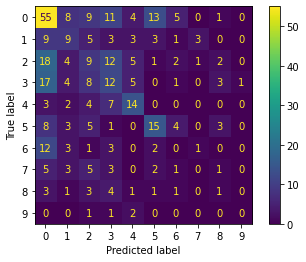

In [36]:
#A confusion matrix  of the predictions of the classifier to see how it performs in detail.
c = confusion_matrix(target_test,predictions)
cm = ConfusionMatrixDisplay(c).plot()

In [37]:
# F1-score measured on test data
f1_score(target_test,predictions,average='macro')

0.2017136101708493

In [38]:
#classification_report
target_names=['(0, 20]constant','(20, 40]constant','(40, 60]constant','(60, 80]constant','(80, 100]constant','(0, 20]intermittent','(20, 40]intermittent','(40, 60]intermittent','(60, 80]intermittent','(80, 100]intermittent',]
print(classification_report(target_test,predictions,digits=3,target_names=target_names,))

                       precision    recall  f1-score   support

      (0, 20]constant      0.423     0.519     0.466       106
     (20, 40]constant      0.243     0.250     0.247        36
     (40, 60]constant      0.180     0.167     0.173        54
     (60, 80]constant      0.211     0.235     0.222        51
    (80, 100]constant      0.412     0.467     0.437        30
  (0, 20]intermittent      0.405     0.385     0.395        39
 (20, 40]intermittent      0.000     0.000     0.000        22
 (40, 60]intermittent      0.000     0.000     0.000        20
 (60, 80]intermittent      0.091     0.067     0.077        15
(80, 100]intermittent      0.000     0.000     0.000         4

             accuracy                          0.305       377
            macro avg      0.196     0.209     0.202       377
         weighted avg      0.275     0.305     0.288       377



{0: '5', 1: '8', 2: '10', 3: '11', 4: '35', 5: '37', 6: '40', 7: '68', 8: '70', 9: '71', 10: '72', 11: '74', 12: '76', 13: '78', 14: '79', 15: '80', 16: '83', 17: '4', 18: '66', 19: '67'}


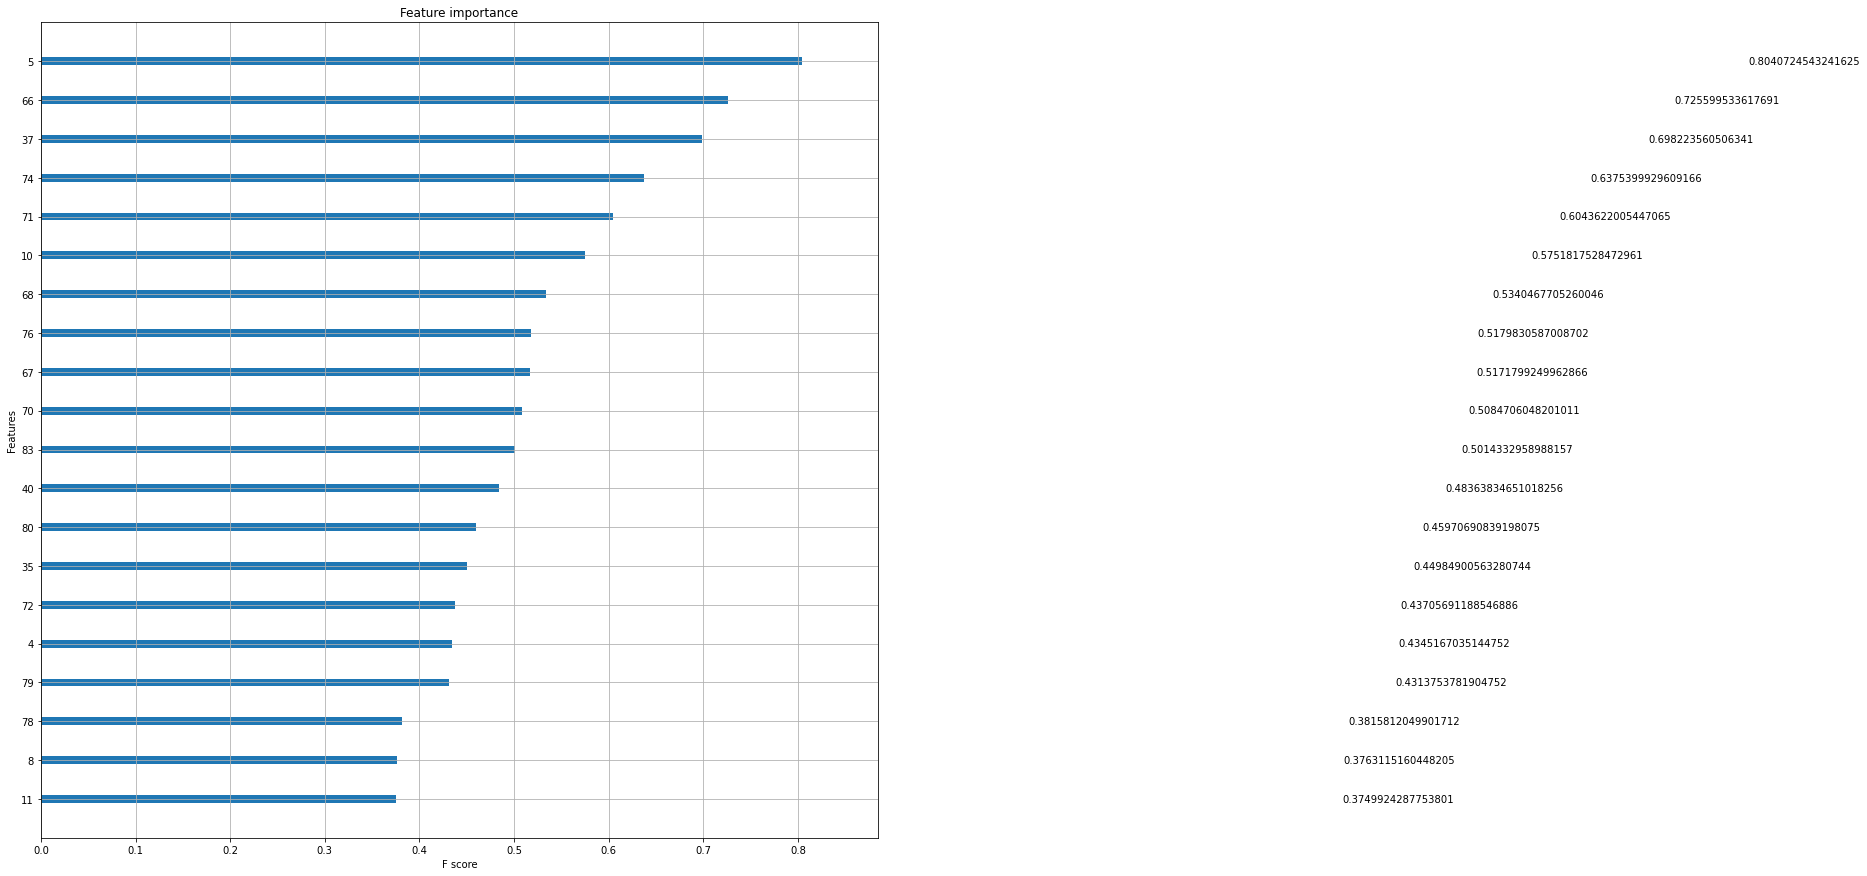

In [39]:
myfeatures = df_train.columns
dict_features = dict(enumerate(myfeatures))

fig, ax = plt.subplots(figsize=(15, 15))
fp= xgb.plot_importance(XGBM, importance_type='gain',ax=ax,
                       );

Text_yticklabels = list(fp.get_yticklabels())
dict_features = dict(enumerate(myfeatures))

lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

fp.set_yticklabels(lst_yticklabels)

print(dict_features)
plt.show()
